In [8]:
!pip install pycountry_convert

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pycountry_convert as pc

- Drop the redundant variables: salary, salary_currency
- Drop duplicate rows
- Don't remove outlier salaries for now
- Grouping variables: job title, empl

In [106]:
# load data
salaries = pd.read_csv("salaries.csv")
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Analyst,82000,USD,82000,US,0,US,M
1,2023,SE,FT,Data Analyst,77000,USD,77000,US,0,US,M
2,2023,SE,FT,Data Engineer,196000,USD,196000,US,100,US,M
3,2023,SE,FT,Data Engineer,94000,USD,94000,US,100,US,M
4,2023,SE,FT,Data Scientist,264846,USD,264846,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
9497,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
9498,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
9499,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
9500,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [107]:
# drop redundant variables
salaries = salaries.drop(["salary", "salary_currency"], axis=1)
salaries

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Analyst,82000,US,0,US,M
1,2023,SE,FT,Data Analyst,77000,US,0,US,M
2,2023,SE,FT,Data Engineer,196000,US,100,US,M
3,2023,SE,FT,Data Engineer,94000,US,100,US,M
4,2023,SE,FT,Data Scientist,264846,US,0,US,M
...,...,...,...,...,...,...,...,...,...
9497,2020,SE,FT,Data Scientist,412000,US,100,US,L
9498,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
9499,2020,EN,FT,Data Scientist,105000,US,100,US,S
9500,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [108]:
# remove duplicate rows
salaries = salaries[~salaries.duplicated()]
salaries

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Analyst,82000,US,0,US,M
1,2023,SE,FT,Data Analyst,77000,US,0,US,M
2,2023,SE,FT,Data Engineer,196000,US,100,US,M
3,2023,SE,FT,Data Engineer,94000,US,100,US,M
4,2023,SE,FT,Data Scientist,264846,US,0,US,M
...,...,...,...,...,...,...,...,...,...
9497,2020,SE,FT,Data Scientist,412000,US,100,US,L
9498,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
9499,2020,EN,FT,Data Scientist,105000,US,100,US,S
9500,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [109]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# group job titles
salaries["job_category"] = salaries["job_title"].apply(assign_broader_category)
salaries = salaries.drop("job_title", axis=1)
salaries

/var/folders/sj/6jz7w0pd3vz6kl3h7kwrx37r0000gn/T/ipykernel_77026/1799998477.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries["job_category"] = salaries["job_title"].apply(assign_broader_category)


,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,SE,FT,82000,US,0,US,M,Data Engineering
1,2023,SE,FT,77000,US,0,US,M,Data Engineering
2,2023,SE,FT,196000,US,100,US,M,Data Engineering
3,2023,SE,FT,94000,US,100,US,M,Data Engineering
4,2023,SE,FT,264846,US,0,US,M,Data Science
...,...,...,...,...,...,...,...,...,...
9497,2020,SE,FT,412000,US,100,US,L,Data Science
9498,2021,MI,FT,151000,US,100,US,L,Other
9499,2020,EN,FT,105000,US,100,US,S,Data Science
9500,2020,EN,CT,100000,US,100,US,L,Data Engineering


In [110]:
def country_code_to_continent(country_code):
    if country_code == "US":
        return "United States"
    elif country_code == "GB":
        return "Great Britain"
    elif country_code == "CA":
        return "Canada"
    elif country_code == "ES":
        return "Spain"
    elif country_code == "DE":
        return "Germany"
    elif country_code == "IN":
        return "India"
    elif country_code == "FR":
        return "France"
    else:
        continent_code = pc.country_alpha2_to_continent_code(country_code)

        continents = {
            "NA": "North America",
            "SA": "South America",
            "AS": "Asia",
            "OC": "Australia",
            "AF": "Africa",
            "EU": "Europe"
        }

        return continents[continent_code]

# group locations
salaries["location"] = salaries["company_location"].apply(country_code_to_continent)
salaries["residence"] = salaries["employee_residence"].apply(country_code_to_continent)
salaries = salaries.drop(["company_location", "employee_residence"], axis=1)
salaries

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,job_category,location,residence
0,2023,SE,FT,82000,0,M,Data Engineering,United States,United States
1,2023,SE,FT,77000,0,M,Data Engineering,United States,United States
2,2023,SE,FT,196000,100,M,Data Engineering,United States,United States
3,2023,SE,FT,94000,100,M,Data Engineering,United States,United States
4,2023,SE,FT,264846,0,M,Data Science,United States,United States
...,...,...,...,...,...,...,...,...,...
9497,2020,SE,FT,412000,100,L,Data Science,United States,United States
9498,2021,MI,FT,151000,100,L,Other,United States,United States
9499,2020,EN,FT,105000,100,S,Data Science,United States,United States
9500,2020,EN,CT,100000,100,L,Data Engineering,United States,United States


# Steps

1. Create model
2. Fit model
3. Make predictions
4. Evaluate model

Don't just pay attention to the RMSE

In [15]:
!pip install scikit-learn

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = salaries.drop("salary_in_usd", axis=1)
X = pd.get_dummies(X)
y = salaries["salary_in_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train

,work_year,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,...,residence_Canada,residence_Europe,residence_France,residence_Germany,residence_Great Britain,residence_India,residence_North America,residence_South America,residence_Spain,residence_United States
859,2023,0,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1025,2023,0,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1769,2023,100,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
9459,2020,50,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1501,2023,100,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,2023,0,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
9233,2022,0,False,False,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
7282,2023,100,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
251,2023,0,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
# create model
linear_model = LinearRegression()

# fit model (ONLY USE THE TRAINING DATA)
linear_model.fit(X_train, y_train)

# predict
y_pred = linear_model.predict(X_test)

# evaluate model
mean_squared_error(y_test, y_pred, squared=False)

56003.70766903103

<Axes: ylabel='salary_in_usd'>

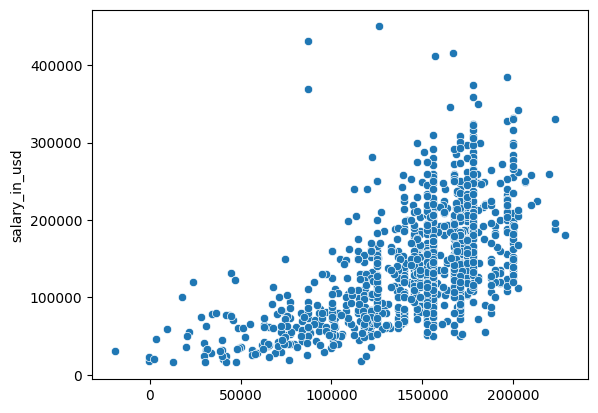

In [18]:
sns.scatterplot(x=y_pred, y=y_test)

In [19]:
pd.DataFrame(linear_model.coef_, X_train.columns, columns=['Coefficient']).sort_values("Coefficient")

,Coefficient
residence_Africa,-56061.271544
location_Spain,-46072.550180
experience_level_EN,-41774.762720
residence_India,-32238.020194
job_category_Data Engineering,-22091.278057
location_Great Britain,-20206.472704
employment_type_FL,-18600.048485
residence_South America,-17739.171654
experience_level_MI,-17396.443796
location_India,-16095.524330


## Neural Networks

In [20]:
!python3 -m pip install tensorflow

In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [111]:
list(salaries)

['work_year',
 'experience_level',
 'employment_type',
 'salary_in_usd',
 'remote_ratio',
 'company_size',
 'job_category',
 'location',
 'residence']

In [113]:
# Select features and target variable
X = salaries[['work_year',
 'experience_level',
 'employment_type',
 'remote_ratio',
 'company_size',
 'job_category',
 'location',
 'residence']]  # Add other features
y = salaries['salary_in_usd']

In [114]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Standardize the features
scaler = StandardScaler()

In [119]:
# Identify categorical columns for one-hot encoding
categorical_cols = ['experience_level', 'employment_type', 'company_size', 'location', 'job_category', 'residence']  # Add other categorical columns

In [120]:
from sklearn.compose import ColumnTransformer

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include='number').columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # This includes non-specified columns as is
)


In [121]:
# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_scaled = preprocessor.transform(X_test)


In [122]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression


In [123]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [124]:
# Convert sparse matrices to dense arrays
X_train_scaled_dense = X_train_scaled.toarray()
X_test_scaled_dense = X_test_scaled.toarray()

In [125]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled_dense.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

In [126]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [127]:
# Train the model
model.fit(X_train_scaled_dense, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
110/110 [==============================] - 1s 4ms/step - loss: 26097152000.0000 - mean_absolute_error: 146124.6094 - val_loss: 24590534656.0000 - val_mean_absolute_error: 141486.8594
Epoch 2/50
110/110 [==============================] - 0s 3ms/step - loss: 26042820608.0000 - mean_absolute_error: 145942.9062 - val_loss: 24473849856.0000 - val_mean_absolute_error: 141083.6562
Epoch 3/50
110/110 [==============================] - 0s 2ms/step - loss: 25812721664.0000 - mean_absolute_error: 145168.4531 - val_loss: 24121634816.0000 - val_mean_absolute_error: 139858.3281
Epoch 4/50
110/110 [==============================] - 0s 2ms/step - loss: 25280319488.0000 - mean_absolute_error: 143352.7656 - val_loss: 23420311552.0000 - val_mean_absolute_error: 137384.7188
Epoch 5/50
110/110 [==============================] - 0s 2ms/step - loss: 24333889536.0000 - mean_absolute_error: 140094.0000 - val_loss: 22279344128.0000 - val_mean_absolute_error: 133263.4688
Epoch 6/50
110/110 [==========

In [128]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_scaled_dense, y_test)
print(f'Mean Squared Error on Test Set: {loss}')
print(f'Mean Absolute Error on Test Set: {mae}')

35/35 [==============================] - 0s 2ms/step - loss: 3524950272.0000 - mean_absolute_error: 45772.8242
Mean Squared Error on Test Set: 3524950272.0
Mean Absolute Error on Test Set: 45772.82421875


In [102]:
# Make predictions
predictions = model.predict(X_test_scaled_dense)

24/24 [==============================] - 0s 2ms/step
